# Communicating Data Findings - Ford GoBike System Data


##### Project 

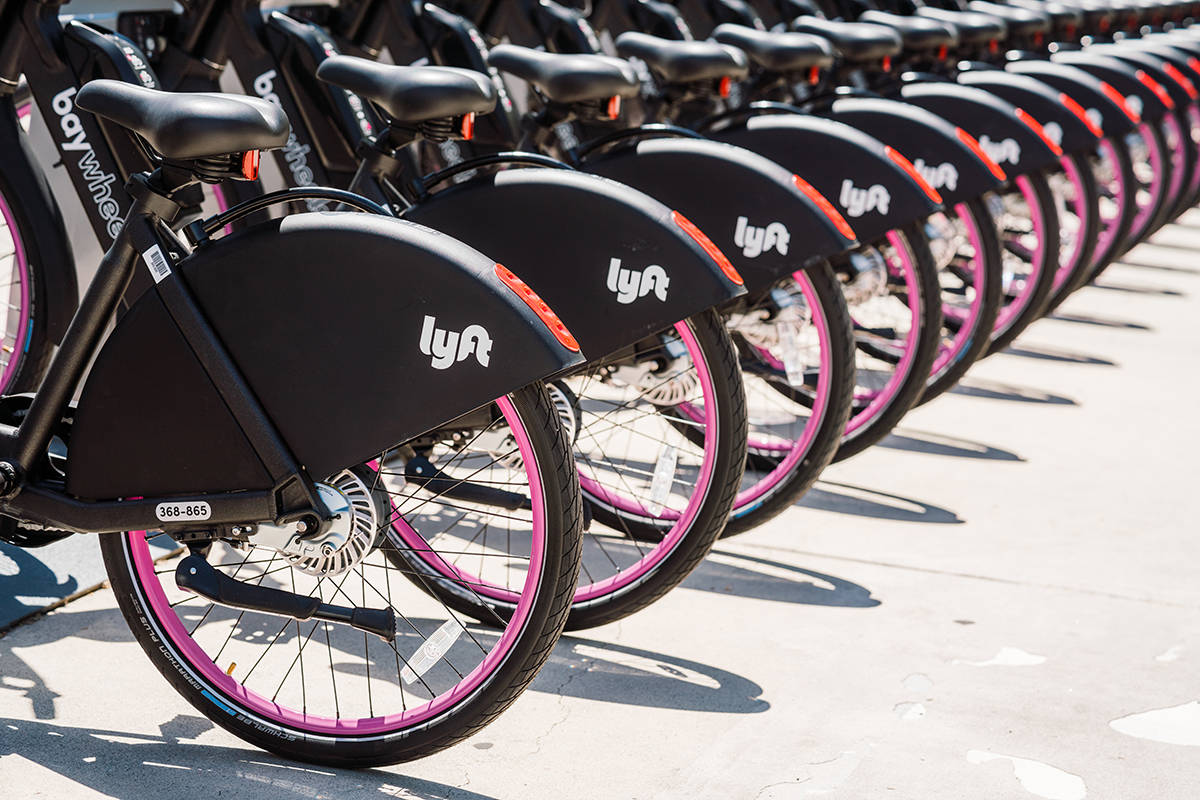

In [62]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import folium

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [63]:
# load in the dataset into a pandas dataframe
csv = 'C:/Users/Rodrigo/Documents/Scripts-Python/Nanodegree/projeto05/projetofinal/bike_clean.csv'
bikec = pd.read_csv(csv)
bikec.sample()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,duration_min
303896,453,2017-09-27 11:41:25.624,2017-09-27 11:48:59.367,58,Market St at 10th St,37.776619,-122.417385,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,3052,Subscriber,7.55


<a id='intro'></a>
# 1 - Introduction

This is notebook is the fifth and last project of Udacity Data Analyst Nanodegree. 

In this last project we're going to work with Exploratory Data Analysis and Explanatory Data Analysis, besides a few other topics about data analysis, such as data cleaning. 

The dataset chosen was the Lyft Bike Sharing System in San Francisco Area. With this data, we'll make several types of visualizations, such as univariate, bivariate, and multivariate plots. The main aim here is to explore many relationships in the data set.

#### 1.1 - What is the structure of the dataset?
The dataset is a csv file with information of all bike rides, when and where it started and finished, the user type and the duration of the ride. 

#### 1.2 - What are the main features of interest in this dataset?
The main features to take a look are: the duration of the rides and wich period it's more commom, where are the stations located, the behavior of each user type.

______________________________________________

## Investigation Overview

> The main goal of this investigation is to analyze the behavior of user types, see the paterns in bikes ride, periods with the most rides and the relation among all these variables. Beyond that a quick spatial view of the distribution of the bike stations.

## Dataset Overview

> The dataset was downloaded from [Lift](https://www.lyft.com/bikes/bay-wheels/system-data) website. In the CSV file there are a lot of information, such as duration of the ride, when and where it started, the type of user and the name of stations, beyond the bike number and location (latitude and longitude). This dataset refers to the 2nd semester of 2017.

## Bikes play an important role in large urban centers

> In recent years, it has been possible to observe an exponential increase in bicycles in large cities, whether private or shareable. This process was due to the concern with the environment, health and the need to move around medium distances - those that are too long to go on foot but are too short to take a taxi, or even in places in that does not have access to transportation, such as buses and metro.
Shareable bicycles today are an important means of transport in large cities, moving millions of people a year and having a positive impact on urban mobility and the environment.

> In the San Francisco Bay Area it's not different. With about 7.7 million people, the Ford GoBike System plays a crucial role in the mobility of the region. The Ford GoBike System has more than 200 bikes and 272 bike stations in 3 cities: San Francisco, Oakland and San Jose.

In [36]:
#Unique bike stations -- now, I want to create a  new df without id repetition, jsut to get the lat long of them
print(bikec.start_station_id.nunique())

#Creating a list with all stations name, lat and long.Then we'll plot them in a map.
station = bikec.copy()

station_name = station['start_station_name'].unique().tolist()
lon_id = station['start_station_longitude'].unique().tolist()
lat_id = station['start_station_latitude'].unique().tolist()


#Where are these bike stations?

sf = folium.Map(location = [37.6089,-122.0963], zoom_start= 10, control_scale=True) #creating the map


#making a loop so it will iterate through all lat, long and name list, and then plot.

lat=lat_id
lon=lon_id
name=station_name

fg=folium.FeatureGroup(name="my map")

for lt, ln, nm in zip(lat,lon,name):
         fg.add_child(folium.Marker(location=[lt,ln],popup="<b>Name:</b> {}".format(nm), icon=folium.Icon(color='pink')))

272


In [64]:
#plotting the map
sf.add_child(fg)

## Stations with the highest number of returns

> The 5 stations with the highest number of returns are located in the Center of San Francisco. 3 of the 5 stations are places of integration with other means of transport, such as train and ferry. The other two stations are in the busy part of the center, close to squares, museums and shops.
This demonstrates the importance of shareable bikes for urban mobility, since it is a vector for integration between different modes.
- 78,119 is the sum of return in these 5 stations, which represents about 15% of all returns.

In [38]:
#What are the stations with the highest number os users?

#Getting the most returned stations' name
top_stations = bikec.end_station_name.value_counts()[:5].index.tolist()
top_stations

#getting the value of bike returns in each station
value_stations = bikec.end_station_name.value_counts().tolist()[:5]
value_stations

#in here I created another list because the names were too big. This is getting better in the labeling.
label_station = ['San Francisco Caltrain','San Francisco Ferry Building',
                 'The Embarcadero at Sansome St','San Francisco Caltrain Station 2','Montgomery St BART Station']


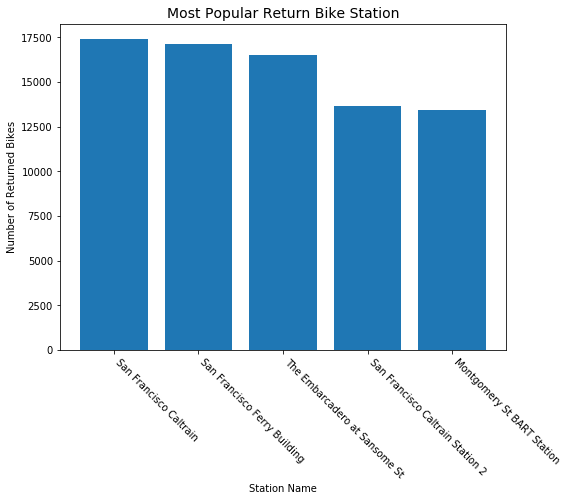

In [39]:
#the lengh of all periods in a list.
value_station = value_stations
station = top_stations #setting the labels
plt.figure(figsize = [8,6])
plt.bar(label_station,value_station) #plotting the chart
plt.title('Most Popular Return Bike Station', size = 14)
plt.xlabel('Station Name')
plt.ylabel('Number of Returned Bikes')
plt.xticks(rotation = "-45", ha = 'left'); #this ha input is a setting to align the labels and the ticks.

## Peak hours

> When we analyze when the system of shared bikes is most activated, we see that it is in the afternoon, between 12pm and 5:59 pm, thus demonstrating - once again - that it is an important means of getting around the city. Whether for leisure, whether to go to and from work, or to improve health. This type of result was already expected.


In [40]:
#creating a new dataframe so I can put the time as index. 
bike_i = bikec.set_index(pd.DatetimeIndex(bikec['start_time']))

In [41]:
#once the dates were indexed, I'm able to set the periods of time, and then, have the sets for further analysis.
late = bike_i.between_time(start_time = '00:00:00',end_time = '05:59:59') #selecting the rides from 00h to 5:59
morning = bike_i.between_time(start_time = '06:00:00',end_time = '11:59:59') #selecting the rides from 6h to 11:59
afternoon = bike_i.between_time(start_time = '12:00:00',end_time = '17:59:59') #selecting the rides from 12h to 17h59
night = bike_i.between_time(start_time = '18:00:00',end_time = '23:59:59') #selecting the rides from 18h to 23:59

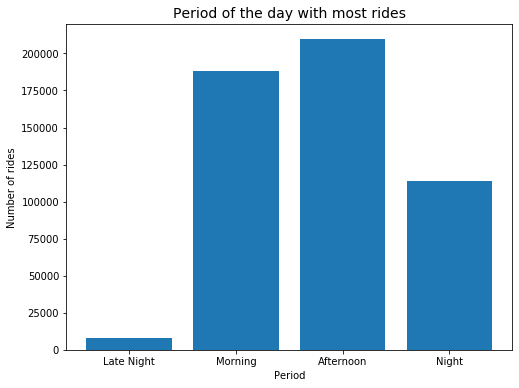

In [42]:
#the lengh of all periods in a list.
rides_period =[(len(late)),(len(morning)),(len(afternoon)),(len(night))]
period = ['Late Night','Morning','Afternoon','Night'] #setting the labels
plt.figure(figsize = [8,6])
plt.bar(period,rides_period) #plotting the chart
plt.title('Period of the day with most rides', size = 14)
plt.xlabel('Period')
plt.ylabel('Number of rides');

## How long does a ride take?

> Another way to make sure of the bike's importance is to check the length of the rides. The longer more probable of a health-ride, the quicker more probable of moving around the city and looking for a better connection between transports. In the chart below we can see that the duration of rides is not that long. The mean is 18 minutes ride.

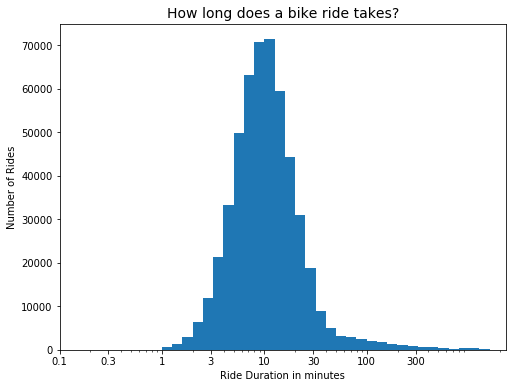

In [43]:
#now, let's take a look at the ride duration distribuiton.
bins = 10 ** np.arange(0,3.2+0.1, 0.1)
plt.figure(figsize = [8,6])
plt.hist(data = bikec, x = 'duration_min', bins = bins)
ticks = [0.1,0.3,1,3,10,30,100,300]
labels = ['{}'.format(v) for v in ticks]
plt.xscale('log')
plt.xticks(ticks, labels);
plt.ylabel('Number of Rides')
plt.xlabel('Ride Duration in minutes')
plt.title('How long does a bike ride takes?', size = 14);

## How is the distribuition of the clients?

> The Ford GoBike System has two types of clients: the subscribers and the customers. The subscribers are the ones that pay a fee and can use the bikes at any time meanwhile the customers are the casual users that is, they are the ones who pay a daily rate.

> Usualy it compensates more being a subscriber than a customer, because the daily fee gets cheaper. Beyond that you'll always have another option for moving around.

> For these 6 months of 2017 we can see that the Subscribers represent 78% of all clients.

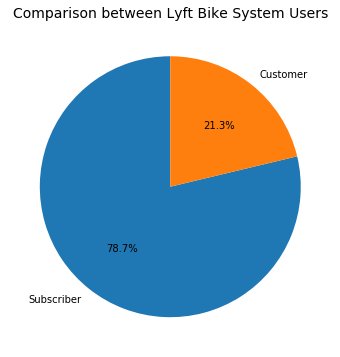

In [44]:
#lets check the percentages of the user type.

#first, lets get the total amount of users
total_user = bikec.user_type.shape[0]

#now, lets get the percentages
sub_user = bikec.query('user_type == "Subscriber"').count()[12]/total_user
cos_user = bikec.query('user_type == "Customer"').count()[12]/total_user

#the last step is to convert the values and labels to a list, and then plot 'em.
percentages = [sub_user,cos_user]
label = ['Subscriber','Customer']

#Setting the figure size and plotting
plt.figure(figsize = [6,6])
plt.pie(x = percentages,labels = label, autopct='%1.1f%%', startangle = 90);
plt.title('Comparison between Lyft Bike System Users', fontsize = 14);

## Who rides more? Customers or Subscribers?

> Buses are crowded? Subway is too far away? Uber fees are way to high? Then you should take a bike

> As mentioned before, if you paid for a long term use of bikes, obviously you'll always find an argument to use them, weather for leisure, work or dislocating thought the city.

> Right below we can see that customers ride longer than subscribers. This might gives us a wrong impression because of 2 main points: `1.` there are way more subscribers than customers. `2.`Usualy people pay one day fee just for leisure, and this reflects on a longer ride. 

> In other words: subscribers tend to use more in a daily basis and customers tend to use sometimes, mostly for leisure. Unfortunetly, there are no data to confirm this tendency.

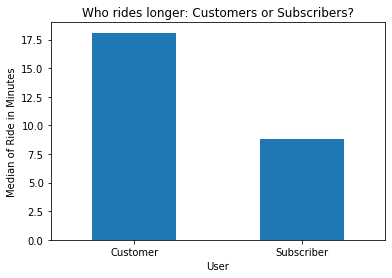

In [45]:
#Now, who rides for more time: customers or subscribers?

user = bikec.groupby(['user_type']).median()
user.duration_min.plot(kind = 'bar')
plt.xlabel('User')
plt.ylabel('Median of Ride in Minutes')
plt.title('Who rides longer: Customers or Subscribers?', fontsize = 12)
plt.xticks(rotation = 0);

## Is there a difference between duration and start time for Customers and Subscribers?

> The chart below doesn't show us an impressive difference between users ride's `start time`and `duration`. The rides aren't month driven, it seems very equal. 

>Interesting to mention: customers chart shows longer rides from `Sep`to `Nov`, but there's no evidence that this is sustainable 

<Figure size 576x576 with 0 Axes>

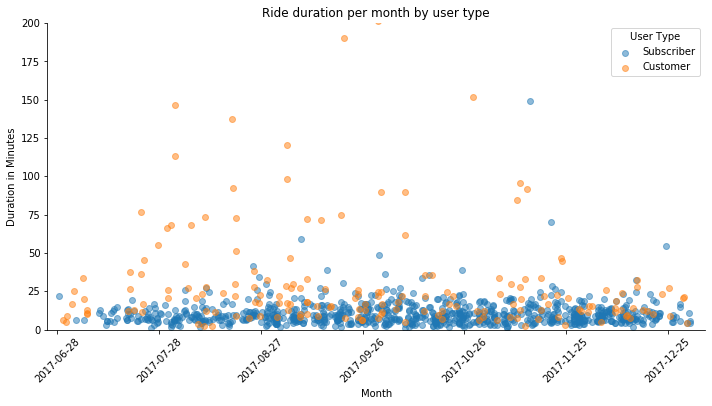

In [46]:
bike_clients = bikec.loc[bikec['user_type'].isin(['Subscriber','Customer'])]
bc = bike_clients.sample(1000)

#starting to build the plot

g = sb.FacetGrid(data = bc, hue = 'user_type', height=5, aspect=2)
g.map(plt.scatter, 'start_time','duration_min', alpha = .5);
plt.ylim(0,200), plt.xlim(pd.Timestamp('2017-06-25'),pd.Timestamp('2018-01-05'))
plt.xlabel('Month'), plt.ylabel('Duration in Minutes')
plt.xticks(np.arange(np.datetime64('2017-06-28'), np.datetime64('2018-01-05'),30),rotation = 45) #labeling with 1 - timestamp number, 2 - str label converter from above
plt.legend(title = 'User Type')
plt.title('Ride duration per month by user type');

## What is the month with most percentages rides for each type of user?

 - The distribuition of the months with the biggest amount of rides are different to each other. This seems to have no correlation. 

- An interesing fact that `Oct`and `Sep`appears in both TOP3.

In [47]:
#creating a new column to make month analysis
bikec['month'] = pd.DatetimeIndex(bikec['start_time']).month

#the month with the most number of rides is October. 
bikec.month.value_counts()

#creating a new df only for subscribers
subs = bikec.query('user_type == "Subscriber"')
#getting the months and coutns from value counts and converting to lists
month_subs_count = subs.month.value_counts().tolist()

#creating a new df only for subscribers
cost = bikec.query('user_type == "Customer"')
#getting the months and coutns from value counts and converting to lists
month_cost_count = cost.month.value_counts().tolist()

#creating the percentages of the rides for subscribers per month.
perc_month_subs_count = []
for i in month_subs_count:
    percent = i/subs.shape[0]
    perc_month_subs_count.append(percent)

#creating the percentages of the rides for costumers per month.
perc_month_cost_count = []
for i in month_cost_count:
    percent = i/cost.shape[0]
    perc_month_cost_count.append(percent)

    #setting the labels more friendly
label_month_s = ['Oct','Nov','Sep','Dec','Aug','Jul','Jun']
label_month_c = ['Sep','Aug','Oct','Nov','Jul','Dec','Jun']


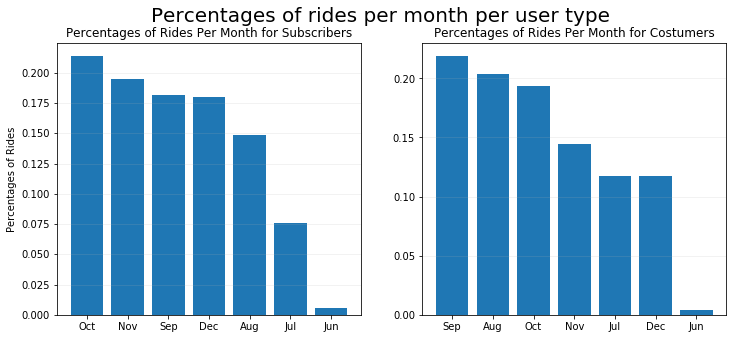

In [48]:
#creating the whole plot
plt.figure(figsize = [12,5])
plt.suptitle('Percentages of rides per month per user type', size = 20)

#setting the 1st plot
plt.subplot(1,2,1)
plt.bar(label_month_s,perc_month_subs_count)
plt.ylabel('Percentages of Rides'), plt.title('Percentages of Rides Per Month for Subscribers')
plt.grid(True, axis = 'y', alpha = 0.2)

#setting the 2nd plot
plt.subplot(1,2,2)
plt.bar(label_month_c,perc_month_cost_count)
plt.title('Percentages of Rides Per Month for Costumers'), plt.grid(True, axis = 'y', alpha = 0.2)

## Conclusions

- Bikes play a tremendous role in the population daily basis of transportation.

- They're used to move between two transports modal, beyond being used in medium distances.

- Subscribers ride are quicker than customers. This might be because subscribers use them daily with a pouporse: moving around the city in a quick and efficient way. While customers take longer rides. This might happen because they use once in a while, or for laisure porposes. 

- The peak hour for using the bikes are in the afternoon. And the stations with most bike returns are those ones with other transport connection or a croweded region.

- The rides avarege is about 18min. But if we take a look for each user type, we'll see that customers ride for 17.5min and subscribers about 8min. 

